In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import diff,solve

In [470]:
X,x_a, x_b, x_L, z_a, z_b = sy.symbols('X, x_a, x_b, x_L, z_a, z_b')
a = 30
x_a0,x_L0,x_b0 = .2,.5,.8
b_a,b_L,b_b = 10,9,10.5

g_L = a*(x_L-x_L0)**2 + b_L
g_a = a*(x_a-x_a0)**2 + b_a
g_b = a*(x_b-x_b0)**2 + b_b

def beta_L(A):
    eq1 = (-diff(g_L) + diff(g_b))
    eq2 = (-diff(g_b) + (g_b - g_L)/(x_b - x_L))
    sol = solve((eq1,eq2),[x_b,x_L])

    x_b_,x_L_ = sol[0][0],sol[0][1]
    z_b_ = (X - x_L_)/(x_b_ - x_L_)
    z_L_ = 1 - z_b_
    return z_b_*g_b.subs(x_b, x_b_) + z_L_*g_L.subs(x_L, x_L_)

def alpha_L(A):
    eq1 = (-diff(g_L) + diff(g_a))
    eq2 = (-diff(g_a) + (g_a - g_L)/(x_a - x_L))
    sol = solve((eq1,eq2),[x_a,x_L])

    x_a_,x_L_ = sol[0][0],sol[0][1]
    z_a_ = (X - x_L_)/(x_a_ - x_L_)
    z_L_ = 1 - z_a_
    return z_a_*g_a.subs(x_a, x_a_) + z_L_*g_L.subs(x_L, x_L_)

def alpha_beta(A):
    eq1 = (-diff(g_a) + diff(g_b))
    eq2 = (-diff(g_b) + (g_b - g_a + A*(1-2*(x_a-X)/(x_a-x_b)))/(x_b - x_a))
    sol = solve((eq1,eq2),[x_a,x_b])

    x_a_,x_b_ = sol[0][0],sol[0][1]
    z_a_ = (X - x_b_)/(x_a_ - x_b_)
    z_b_ = 1 - z_a_
    return z_a_*g_a.subs(x_a,x_a_) + z_b_*g_b.subs(x_b,x_b_) + A*z_a_*z_b_

def alpha_beta_L(A):
    eq1 = (-diff(g_a) + diff(g_b))
    eq2 = (-diff(g_b) + diff(g_L))
    eq3 = (-diff(g_L) + (g_a - g_L + A*z_b)/(x_a - x_L))
    eq4 = (-diff(g_L) + (g_b - g_L + A*z_a)/(x_b - x_L))
    eq5 = (X - ((1-z_a-z_b)*x_L + z_a*x_a + z_b*x_b))
    sol = solve((eq1,eq2,eq3,eq4,eq5),[x_a,x_b,x_L,z_a,z_b])
    
    if np.size(sol) == 0:
        return float('inf')
    else:
        x_a_,x_b_,x_L_ = sol[0][0],sol[0][1],sol[0][2]
        z_a_,z_b_ = sol[0][3],sol[0][4]
        z_L_ = 1-z_a_-z_b_
    return z_a_*g_a.subs(x_a,x_a_) + z_b_*g_b.subs(x_b,x_b_) + z_L_*g_L.subs(x_L,x_L_) + A*z_a_*z_b_

#Intersect common tangent and free energies
def intersect_bL_G(com_tan_bL):
    eq1 = (com_tan_bL - g_L.subs(x_L,X))
    sol_L = solve((eq1),[X])
    eq2 = (com_tan_bL - g_b.subs(x_b,X))
    sol_b = solve((eq2),[X])
    #Sometimes rounding errors may result in 2 very similar answers, on the order of 1e-8, also may end in imaginary error
    return np.array([sy.re(sol_L[0]), sy.re(sol_b[0])])

def intersect_aL_G(com_tan_al):
    eq1 = (com_tan_al - g_L.subs(x_L,X))
    sol_L = solve((eq1),[X])
    eq2 = (com_tan_al - g_a.subs(x_a,X))
    sol_a = solve((eq2),[X])
    return np.array([sy.re(sol_L[0]), sy.re(sol_a[0])])

def intersect_ab_G(com_tan_ab):
    eq1 = (com_tan_ab - g_a.subs(x_a,X))
    sol_a = solve((eq1),[X])
    eq2 = (com_tan_ab - g_b.subs(x_b,X))
    sol_b = solve((eq2),[X])
    return np.array([sy.re(sol_a[0]), sy.re(sol_b[0])])

def intersection_points(com_tan,g_1,g_2,x_1,x_2):
    eq1 = (com_tan - g_1.subs(x_1,X))
    sol_1 = solve((eq1),[X])
    eq2 = (com_tan - g_2.subs(x_2,X))
    sol_2 = solve((eq2),[X])
    return np.array([sy.re(sol_1[0]), sy.re(sol_2[0])])


#Intersect common tangents
def intersect_aL_bL(com_tan_aL,com_tan_bL):
    eq1 = (com_tan_aL - com_tan_bL)
    sol_aL_bL = np.array(solve((eq1),[X]))
    return sol_aL_bL[np.where((sol_aL_bL > 0)&(sol_aL_bL < 1))]

def intersect_aL_ab(com_tan_aL,com_tan_ab):
    eq1 = (com_tan_aL - com_tan_ab)
    sol_aL_ab = np.array(solve((eq1),[X]))
    return sol_aL_ab[np.where((sol_aL_ab > 0)&(sol_aL_ab < 1))]

def intersect_bL_ab(com_tan_bL,com_tan_ab):
    eq1 = (com_tan_bL - com_tan_ab)
    sol_bL_ab = np.array(solve((eq1),[X]))
    return sol_bL_ab[np.where((sol_bL_ab > 0) & (sol_bL_ab < 1))]

def grid_search(common_bl,common_al,common_ab):
    grid_1 = np.concatenate((intersect_bL_G(common_bl),intersect_aL_G(common_al),intersect_ab_G(common_ab)))
    grid_2 = np.concatenate((intersect_aL_bL(common_al,common_bl),intersect_aL_ab(common_al,common_ab),intersect_bL_ab(common_bl,common_ab)))
    full_grid = np.concatenate((grid_1,grid_2))
    return np.sort(full_grid)
# # common_abl = sy.lambdify(X,alpha_beta_L(1))

In [471]:
intersect = intersection_points(common_al,g_a,g_L,x_a,x_L)

#Outside of the intersections is infeasible
def correct_tangent(com_tan,intersection_points):
    new_tangent = sy.Piecewise(
        (float('inf'),X < min(intersection_points)),
        (float('inf'),X > max(intersection_points)),
        (com_tan,True))
    return new_tangent


In [472]:
common_bl = beta_L(s)
common_al = alpha_L(s)
common_ab = alpha_beta(s)
common_abl = alpha_beta_L(s)

In [473]:
common_bl

5.0*X + 6.29166666666667

In [474]:
def intersect_abl(com_abl,com_al,com_bl): #delete out? 
    eq1 = (com_abl - com_al)
    sol_1 = solve((eq1),[X])
    eq2 = (com_abl - com_bl)
    sol_2 = solve((eq2),[X])
    return np.array([sy.re(sol_1[0]), sy.re(sol_2[0])])

In [475]:
c = sy.lambdify(X,correct_tangent(common_al,intersect))

In [476]:
common_bl = beta_L(1)
common_al = alpha_L(1)
common_ab = alpha_beta(1)
common_abl = alpha_beta_L(2)
check_points = grid_search(common_bl,common_al,common_ab)
print(check_points)

[0.144444436432108 0.194236132807981 0.241666641857467 0.444444430389877
 0.513888888888889 0.583333333333333 0.786111085356247 0.833541644969801
 0.883333333333333]


In [477]:
def check_phase(check_points,common_al,common_bl,common_ab):
    phases = np.array(['αL','βL','αβ'])
    exit = []
    al_tangent = sy.lambdify(X,common_al)
    bl_tangent = sy.lambdify(X,common_bl)
    ab_tangent = sy.lambdify(X,common_ab)
    for i,val in enumerate(check_points):
        al = al_tangent(val)
        bl = bl_tangent(val)
        ab = ab_tangent(val)
        check = np.array([al,bl,ab])
        print(check)
        index = np.argmin(check)
        exit.append(phases[index])
    return dict(zip(check_points,exit))

check_phase(check_points,common_al,common_bl,common_ab)

[10.0925926193004 7.01388884882721 9.78009256779253]
[9.92662029804749 7.26284733070657 9.92662029804750]
[9.76851860121588 7.49999987595400 10.0520832713104]
[9.09259263944117 8.51388881861605 10.4331537993947]
[8.86111111111113 8.86111111111112 10.5057870370371]
[8.62962962962965 9.20833333333334 10.5488945578232]
[7.95370378955327 10.2222220934479 10.5057870584994]
[7.79560192417476 10.4593748915157 10.4593748915157]
[7.62962962962965 10.7083333333333 10.3958333333334]


{0.144444436432108: 'βL',
 0.194236132807981: 'βL',
 0.241666641857467: 'βL',
 0.444444430389877: 'βL',
 0.513888888888889: 'βL',
 0.583333333333333: 'αL',
 0.786111085356247: 'αL',
 0.833541644969801: 'αL',
 0.883333333333333: 'αL'}

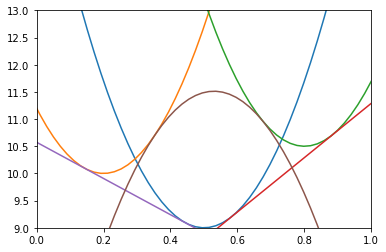

In [478]:
#Graphical construction -- Check to make sense? 

s = 5
common_bl = beta_L(s)
common_al = alpha_L(s)
common_ab = alpha_beta(s)
common_abl = alpha_beta_L(s)

common_bl_ = sy.lambdify(X,common_bl)
common_al_ = sy.lambdify(X,common_al)
common_ab_ = sy.lambdify(X,common_ab)
common_abl_ = sy.lambdify(X,common_abl)

g_L_ = lambda x_L: a*(x_L-x_L0)**2 + b_L
g_a_ = lambda x_a: a*(x_a-x_a0)**2 + b_a
g_b_ = lambda x_b: a*(x_b-x_b0)**2 + b_b

x = np.linspace(-1,1,100)
plt.plot(x,g_L_(x))
plt.plot(x,g_a_(x))
plt.plot(x,g_b_(x))
plt.plot(x,common_bl_(x))
plt.plot(x,common_al_(x))
plt.plot(x,common_ab_(x))
plt.plot(x,common_abl_(x))
# if common_abl(x).any() != float('inf'):
#     plt.plot(x,common_abl(x))
plt.ylim(9,13)
plt.xlim(0,1)
plt.show()

In [295]:
common_bl = beta_L(1)
common_al = alpha_L(1)
common_ab = alpha_beta(1)
# print(intersect_bL_G(common_bl))
# print(intersect_aL_G(common_al))
# print(intersect_ab_G(common_ab))
x = grid_search(common_bl,common_al,common_ab)

1.37772809711438

In [280]:
intersect_bL_G(common_bl)

array([0.416666666666667, 0.716666666666667], dtype=object)

In [281]:
print(intersect_aL_bL(common_al,common_bl))
print(intersect_aL_ab(common_al,common_ab))
print(intersect_bL_ab(common_bl,common_ab))

[0.513888888888889]
[0.275545619422876]
[0.752232158354901]


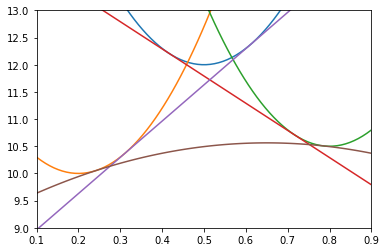

In [302]:
common_bl_ = sy.lambdify(X,common_bl)
common_al_ = sy.lambdify(X,common_al)
common_ab_ = sy.lambdify(X,common_ab)

g_L_ = lambda x_L: a*(x_L-x_L0)**2 + b_L
g_a_ = lambda x_a: a*(x_a-x_a0)**2 + b_a
g_b_ = lambda x_b: a*(x_b-x_b0)**2 + b_b

x = np.linspace(0,1,100)
plt.plot(x,g_L_(x))
plt.plot(x,g_a_(x))
plt.plot(x,g_b_(x))
plt.plot(x,common_bl_(x))
plt.plot(x,common_al_(x))
plt.plot(x,common_ab_(x))
# if common_abl(x).any() != float('inf'):
#     plt.plot(x,common_abl(x))
plt.ylim(9,13)
plt.xlim(.1,.9)
plt.show()

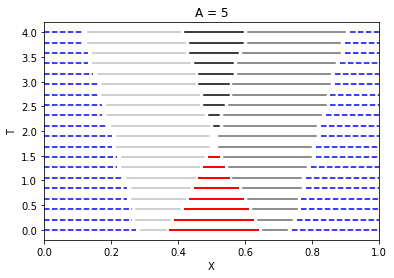

In [57]:
#for example (un-comment to see how to input)
x_a, x_b, x_L = sy.symbols('x_a, x_b, x_L')

x_a0,x_L0,x_b0 = .2,.5,.8
b_a,b_L,b_b = 10,12,10.5
a = 40
T_grid = np.linspace(0,4,20)

g_a = a*(x_a-x_a0)**2 + b_a
g_b = a*(x_b-x_b0)**2 + b_b
for i in range(len(T_grid)):
    T = T_grid[i]
    g_L = a*(x_L-x_L0)**2 + b_L - T
    plot(g_a,g_b,g_L,T,A = 5, x_range = [0,1],grid_points = 70)
# plt.legend()
plt.show()